# Homework 5: Linear Regression

## Question 8.1

In [1]:
options(repr.plot.width = 8, repr.plot.height = 5)

As a tv research analyst, linear regression may be helpful at my work in predicting and analyzing program ratings.  
  
A lot of our data is fairly straightforward, consisting of demographic, location, and consumer "profiling" information based off of likes, dislikes, and claimed interests (e.g. think of people interested in history and documentaries vs scifi thrillers).  
Other more complicated data we have include marketting information, such as response rates to email vs website surveys, awareness of an upcoming tv program, and intent to view for a program.  
Using these metrics on previous programs as training data, we can predict how well a show will do.  
  
Furthermore, we can examine the predictors through regression analysis to see how important each feature is. For example, is marketting an effective way to improve ratings? What type of marketting is the most efficient? Either p-value testing or looking at coefficients will tell us how impactful the features are. As a side, random forest regression is a quick-and-easy way of looking at which predictors are useful/ not collinear. 

## Question 8.2

First things first, let's read in the data.

In [2]:
df.raw <- read.table('uscrime.txt', header=TRUE)

predict <- c(14.0,0,10.0,12.0,15.5,0.640,94.0,150,1.1,0.120,3.6,3200,20.1,0.04,39.0,mean(df.raw$Crime))
df.raw <- rbind(df.raw, predict)

### Data Exploration & Transformation

While these two deserve to be steps entirely on their own, for the sake of keeping this assignment from being a giant project, we can combine the two as we go. It is important to note that, as the (might have?) professor mentioned, we there are entire graduate level courses that go into data explroation and, seperately, transformation.

#### Target Variable: US Crime

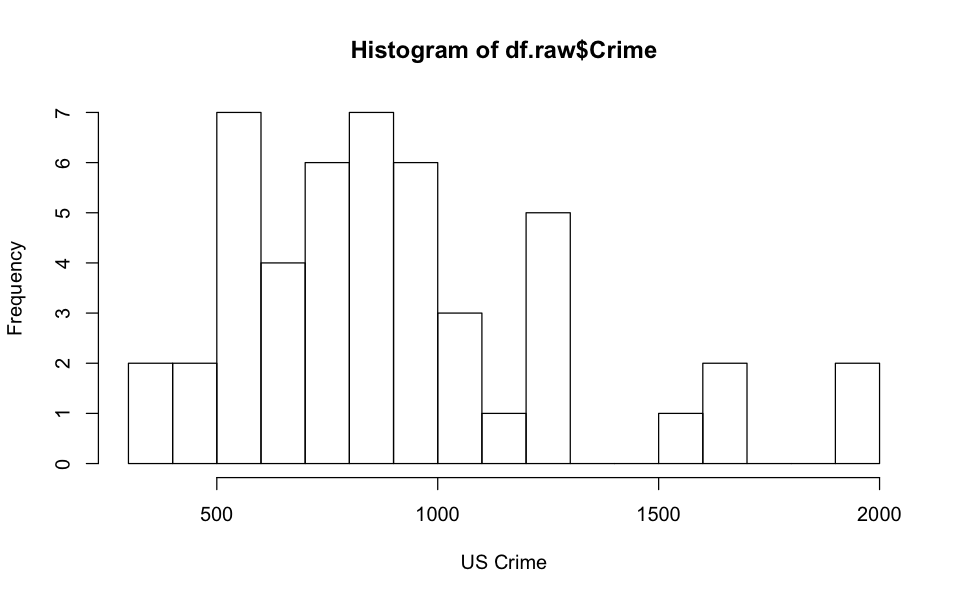

In [3]:
hist(df.raw$Crime, 
     breaks=12, xlab="US Crime")

It looks like the data is skewed, with a longer tail to the right. Furthermore, it doesn't look like we have a lot of data points - as was mentioned by the professor/TA, we also have a lot of predictors compared to data points which may lead to overfitting.  
  
Another thought that comes to mind is of sampling. Since we do not have a lot of points, randomly sampling from the raw data may lead to not ending up with a good, representative population. Linear regression is not meant for extrapolation, like how Time Series models are used to predict the y(t) for t not yet seen before.  

What this tells us is that we probably want to transform the data to be normal. We will also want to scale or normalize the data. Keeping those in mind, let us explore a bit more.

#### Predictor Features

Let us make a checklist of what needs to be looked at from the start.  
- Discrete vs Continuous Features
- Normally distributed  
- Multicollinearity

There are the obvious ones that come to mind.

#### Discrete vs Continuous

In [4]:
str(df.raw)

'data.frame':	48 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : num  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : num  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: num  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : num  791 1635 578 1969 1234 ...


Is it fairly easy to see that the only categorical (hopefully?) feature is "So". This could also have been known by reading the open-sourced descriptions of USCrime data.

#### Normal Distribution and Normalizing

Let us examine which of the variables are Normally distributed. We can look at the skewness of each variable, and then adjust them accordingly to follow a more Normal distribution.

In [5]:
# Null hypothesis: data is Normally distributed
df.numeric <- df.raw[,-2]
sapply(df.numeric, shapiro.test)

,M,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
statistic,0.9493921,0.9250475,0.9284059,0.9182284,0.9606952,0.9257713,0.7618573,0.8159186,0.9377309,0.9673376,0.96969,0.9415729,0.9368826,0.9796949,0.9124921
p.value,0.03782111,0.004499167,0.005958542,0.002576027,0.1077095,0.004778303,1.973128e-07,3.038108e-06,0.01328757,0.1990672,0.2463769,0.0186616,0.01233631,0.5660586,0.001632544
method,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test,Shapiro-Wilk normality test
data.name,X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]],X[[i]]


In [6]:
# Install packages if not already installed
# Saves time in running code when constantly refreshing notebook, as I often do
if(!require(moments)){install.packages("moments")}
if(!require(MASS)){install.packages("MASS")}

library(moments)
library(MASS)

Loading required package: moments
Loading required package: MASS


In [7]:
# NOT Normally distributed data
# Negative skew means left skew, positive means right skew, with magnitude indicating how much skewness is present
notNorm <- c("M", "Ed", "Po1", "Po2", "M.F", "Pop", "NW", "U1", "Ineq", "Crime")
sapply(df.numeric[,notNorm], skewness)

M         Ed        Po1        Po2        M.F        Pop         NW 
 0.8502856 -0.3009773  0.8499664  0.8966479  0.9964279  1.7710507  1.4465906 
        U1       Ineq      Crime 
 0.7307517  0.3716541  1.0999988

To summarize, we just looked at whether or not a feature is Normally distributed under the Shapiro-Wilks test, then looked at how skew the features are. While we can always nitpick at making each feature EXACTLY Normally distributed, let us just focus on the major problems for now.  
It looks like most of the left skew features are not relatively as skewed as some of the right skew. This can also be seen by the p-values of the Shapiro Test. 

In [8]:
rskew <- c("M", "Po1", "Po2","Pop", "U1", "M.F", "NW", "Crime")

df.log <- df.numeric
df.log[,rskew] <- log(df.numeric[,rskew])

In [9]:
sapply(df.log[,c(rskew)], skewness)

M         Po1         Po2         Pop          U1         M.F 
 0.62341794  0.23556687  0.27836897 -0.11118065  0.40431295  0.91758174 
         NW       Crime 
-0.49322767  0.05536176

We can see that while not perfect, the data looks to be a little more centered. If we had drawn up a histogram for each one, we could see this visually. However, since that takes up a lot of space, we can understand the general shape by looking at the skew.  
  
One other worthy mention is kurtosis - how peaked the data is, or how sharp the point of the histogram. While we could go into kurtosis, deeper into skew, and using negative roots to transform the left skew features, we've already done a fair bit of work to get here so let us move on. 

#### Correlation and Multicollinearity

In [10]:
if(!require(MASS)){install.packages("reshape2")}
if(!require(MASS)){install.packages("ggplot2")}

library(ggplot2)
library(reshape2)

In [11]:
if(!require(MASS)){install.packages("reshape2")}
if(!require(MASS)){install.packages("ggplot2")}

library(ggplot2)
library(reshape2)

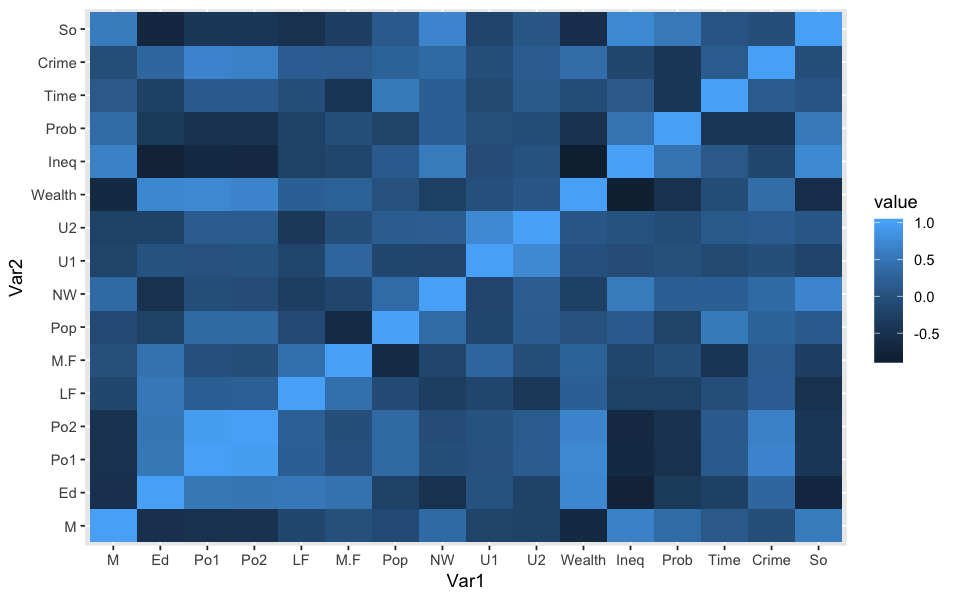

In [12]:
df.log['So'] <- df.raw['So']
cormatrix <- cor(df.log)
melt <- melt(cormatrix)
ggplot(data = melt, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

First, we see which features are highly correlated with Crime. The most obvious ones are Po1, Po2, Wealth, Pop, Ed, M.F, LF in that order (or roughly, based on the coloring).  
Also, we see a high level of correlation between some variables so it might be better to take some of these out. For example:
- Prob vs So (early had done so with 
- Ineq vs M, So, NW  

We can spend a lot of time looking at this, but let us move on for now.

### Model Building and Testing

I choose to sort the model before testing because we have so little data. I actually tried doing so without sorting and selecting "randomly" without regard to selecting evenly from the Crime distribution and got a much better score. Since the score I am about to show it pretty bad, it makes sense that I was grossly overfitting the data or performing extrapolation. 

In [13]:
# Take out prediction row
predict.this <- df.log[48,]
df.val <- df.log[-48,]
df.val <- df.val[order(df.val$Crime),]

In [14]:
# Split training and testing sets
testRows <- c(5, 10, 15, 20, 25, 30, 35, 40, 45)

df.train <- df.val[-testRows,]
df.test <- df.val[testRows,]

df.test.x <- df.test[,-15]
df.test.y <- df.test$Crime

In [15]:
# Train the model
lm <- lm(Crime~., data=df.train)

### Results

In [16]:
# Range of Crime variable
min(df.raw$Crime)
max(df.raw$Crime)

[1] 342

[1] 1993

In [17]:
# Testing Model
ans <- exp(1)^predict(lm, df.test.x)
df.test.y.ans <- exp(1)^df.test.y

sqrt(mean((ans - df.test.y.ans)^2))

[1] 316.3362

In [18]:
# This is our prediction on the question
exp(1)^predict(lm, predict.this)

48 
653.4771

Here, to get the actual solution, we had to undo the log transformation on Crime that we applied early. Then, we can look at the root-mean-square-error, a popular metric. We got an error of 316, with a range of 342-1993. 
  
Our prediction on the hw question is 512.42

### Summary

Below are the coefficients and R values of the model

In [19]:
lm


Call:
lm(formula = Crime ~ ., data = df.train)

Coefficients:
(Intercept)            M           Ed          Po1          Po2           LF  
  7.234e+00    1.700e+00    1.934e-01    2.166e+00   -1.088e+00    6.536e-01  
        M.F          Pop           NW           U1           U2       Wealth  
 -2.355e+00   -7.575e-02    4.580e-02    1.555e-02    8.589e-02    3.555e-05  
       Ineq         Prob         Time           So  
  7.622e-02   -6.734e+00   -1.460e-02    8.875e-02  


In [20]:
summary(lm)$r.squared
summary(lm)$adj.r.squared

[1] 0.8743399

[1] 0.7886626

The model named 'lm' has an R-squared of 0.82 and an R-Squared Adjusted of 0.74.  
Given the huge difference, I would take the adjusted value to be more important since we do have a lot of features for the number of data points, which is what the professor warned us about. 
  This is also reinforced by how we have a high R value but a bad testing score.

## BUT WAIT! What about all of the exploration we did?

There isn't a great answer this question. Ultimately, as mentioned before, all of the log transformations were applied and the analysis let us set up the data. What we did not do anything with is correlation. We can look at the correlation and have taken out some features, to avoid multicollinearity, which influences overfitting.
  
Instead, since we already looked at those, let us examine yet ANOTHER way to fight against collinearity.

__PCA__ is a dimensionality reduction algorithm that looks for the variance within the data. Imagine there is no variance between two features - then what does one feature tell us that the other does not? This is just an intuitive, easy explanation, but we can see how it is a useful algorithm already.  
Principal Component Analysis actually transforms the data set. This is important to know because rather than simply choosing a few features, we are actually getting a set of linear combinations of them.  
  
Basically - instead of losing features that only give a "little" of information, we get to keep as much of that information as possible.

In [101]:
pca <- prcomp(df.val[,-15])
df.pca <- cbind(pca$x[,1:10], df.val$Crime)

In [111]:
# Split training and testing sets
testRows <- c(5, 10, 15, 20, 25, 30, 35, 40, 45)

df.pca.train <- data.frame(df.pca[-testRows,])
df.pca.test <- data.frame(df.pca[testRows,])

colnames(df.pca.train)[11] = "Crime"
colnames(df.pca.test)[11] = "Crime"

df.pca.test.x <- df.pca.test[,-11]
df.pca.test.y <- df.pca.test$Crime

In [112]:
lm.pca <- lm(Crime~., data=df.pca.train)

In [113]:
ans.pca <- exp(1)^predict(lm.pca, df.pca.test.x)
df.pca.test.y.ans <- exp(1)^df.pca.test.y

sqrt(mean((ans-df.pca.test.y.ans)^2))

[1] 519.5209

In [116]:
summary(lm.pca)$r.squared
summary(lm.pca)$adj.r.squared

[1] 0.7963333

[1] 0.7209012

Ultimately, it looks like I failed. The score is much worse than before.  
One thing to note, and hopefully this is not pure speculation or chance, is that the R and R Adjusted values are closer together in this model. I assume that this is because our model is slightly less overfitted than the last one.
  
### NOTES - REFLECTION
  
  
Something to look into is how to properly use PCA. Sometimes the score may go down since we are reducing dimensionality, but the hope is that we can still get a good score since the difference between the two are pretty severe in this example. Furthermore, we can look at other types of linear regression, or other hyperparameters, to try and make a better model.  